# Import Libraries

In [0]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Dataset

In [74]:
df=pd.read_csv('data.csv')
print(df.shape)
df.head()

(11500, 180)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Exploratory Data Analysis

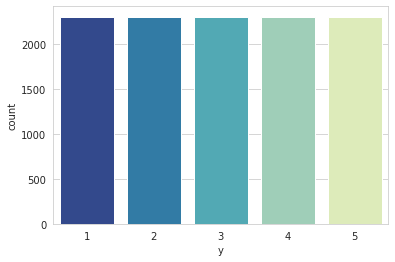

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=df, palette='YlGnBu_r')

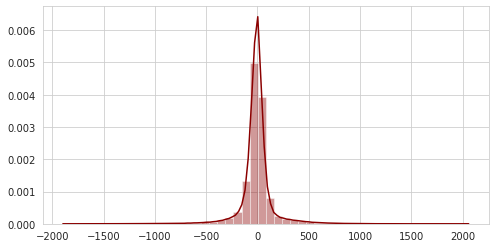

In [76]:
plt.figure(figsize=(8,4))
sns.distplot(df.iloc[:,1:179], color='darkred',bins=50)

In [0]:
df['X'] = df['Unnamed: 0'].str.split('.').str[0]
df=df.drop('Unnamed: 0', axis=1)

In [78]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y,X
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4,X21
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1,X15
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5,X8
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5,X16
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5,X20


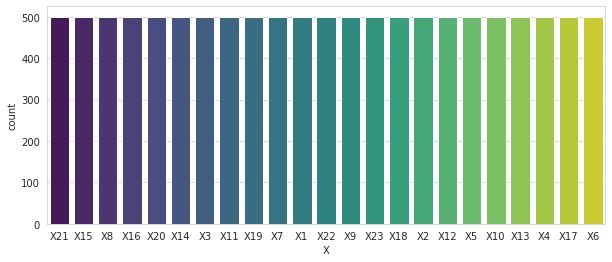

In [79]:
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.countplot(x='X',data=df, palette='viridis')

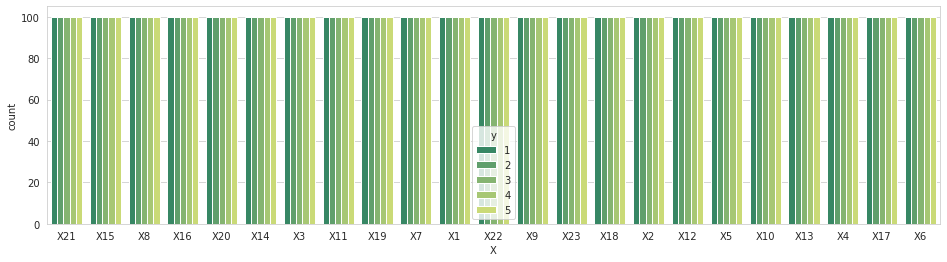

In [80]:
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
sns.countplot(x='X',hue='y',data=df,palette='summer')

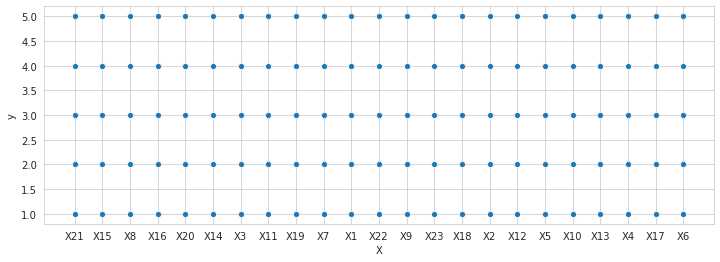

In [81]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='X',y='y',data=df)

In [82]:
df['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [83]:
# All subjects falling in classes 2, 3, 4 and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. 
df['Epilepsy Prediction'] = df['y'].apply(lambda x: 'Epileptic Seizure' if x==1  else 'Not Have Epileptic Seizure')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y,X,Epilepsy Prediction
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4,X21,Not Have Epileptic Seizure
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1,X15,Epileptic Seizure
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5,X8,Not Have Epileptic Seizure
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5,X16,Not Have Epileptic Seizure
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5,X20,Not Have Epileptic Seizure


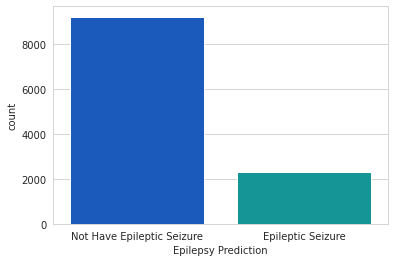

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='Epilepsy Prediction',data=df, palette='winter')

In [85]:
df['Epileptic Seizure'] = pd.factorize(df['Epilepsy Prediction'])[0]
df=df.drop(['y', 'X', 'Epilepsy Prediction'], axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,Epileptic Seizure
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


# Dealing with Imbalanced Dataset

In [0]:
# Class count
count_class_0, count_class_1 = df['Epileptic Seizure'].value_counts()

# Divide by class
df_class_0 = df[df['Epileptic Seizure'] == 0]
df_class_1 = df[df['Epileptic Seizure'] == 1]


Random over-sampling:
1    9200
0    9200
Name: Epileptic Seizure, dtype: int64


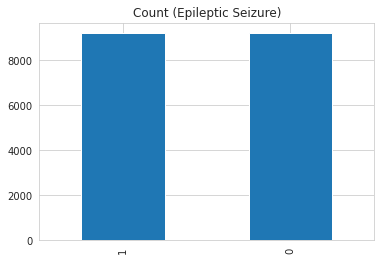

In [87]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df['Epileptic Seizure'].value_counts())

df['Epileptic Seizure'].value_counts().plot(kind='bar', title='Count (Epileptic Seizure)');

# Train Test Split

In [0]:
X=df.drop('Epileptic Seizure', axis=1)
y=df['Epileptic Seizure']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Base Learners

# Support Vector Machine

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
clfs = []
kfolds = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
np.random.seed(1)

param_grid = {'C': [1], 'gamma': [0.1], 'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(probability=True), param_grid, cv = kfolds, refit=True, verbose=1)
grid_svm.fit(X_train,y_train)

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

clfs.append(grid_svm)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min finished


# Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)
clfs.append(nb)

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test, y_test)
clfs.append(dtree)

In [94]:
# Accuracy scores of Base Learners
print('support vector machine: {}'.format(grid_svm.score(X_test, y_test)))
print('Gaussian NB: {}'.format(nb.score(X_test, y_test)))
print('Decision Tree: {}'.format(dtree.score(X_test, y_test)))


support vector machine: 0.9019927536231884
Gaussian NB: 0.9344202898550724
Decision Tree: 0.972463768115942


# Majority Voting 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min finished


majority voting accuracy:  0.9358695652173913


[[2709   57]
 [ 297 2457]]


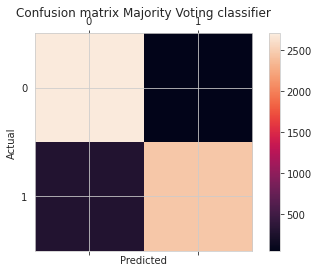



              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2766
           1       0.98      0.89      0.93      2754

    accuracy                           0.94      5520
   macro avg       0.94      0.94      0.94      5520
weighted avg       0.94      0.94      0.94      5520



In [95]:
# The Accuracy scores of Base Learners i.e., SVM, GaussianNB and Decision Tree are given as an input to Majority Voting Classifier and Weighted Average Voting Classifier.
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib

#create a dictionary of base learners
estimators=[('svm', grid_svm), ('nb', nb), ('dt', dtree)]
#create voting classifier
majority_voting = VotingClassifier(estimators, voting='hard')

#fit model to training data
majority_voting.fit(X_train, y_train)
#test our model on the test data
majority_voting.score(X_test, y_test)

# save best model to current working directory
joblib.dump(majority_voting, "Epileptic_Seizure.pkl")

# load from file and predict 
model_max_v = joblib.load("Epileptic_Seizure.pkl" )

# get predictions from best model above
y_preds_mv = model_max_v.predict(X_test)
print('majority voting accuracy: ',majority_voting.score(X_test, y_test))
print('\n')

import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds_mv, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix Majority Voting classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_preds_mv))

# Weighted Average Voting

ensamble score: 0.24621667218025126
Best Weights: [0.04958774 0.20906251 0.74134975]
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min finished


The accuracy weighted average classifier is : 0.9697463768115943
weighted_average_accuracy:  0.9697463768115943


[[2631  135]
 [  32 2722]]


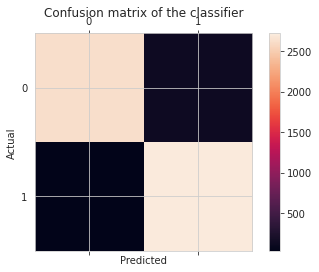



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2766
           1       0.95      0.99      0.97      2754

    accuracy                           0.97      5520
   macro avg       0.97      0.97      0.97      5520
weighted avg       0.97      0.97      0.97      5520



In [96]:
# finding the optimum weights
from scipy.optimize import minimize
predictions = []
for clff in clfs:
    predictions.append(clff.predict(X_test))

def log_loss_func(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction

    return log_loss(y_test, final_prediction)
    
#the algorithms need a starting value, right not we chose 0.5 for all weights
#its better to choose many random starting points and run minimize a few times
starting_values = [0.5]*len(predictions)

#adding constraints  and a different solver
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
#weights are bound between 0 and 1
bounds = [(0,1)]*len(predictions)

res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensemble score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

weighted_avg = VotingClassifier(estimators, voting='soft',weights=res['x']).fit(X_train, y_train)
print('The accuracy weighted average classifier is :', weighted_avg.score(X_test,y_test))

# save best model to current working directory
joblib.dump(weighted_avg, "Epileptic_Seizure.pkl")

# load from file and predict
model_w_avg = joblib.load("Epileptic_Seizure.pkl" )

# get predictions from best model above
y_pred_wa = model_w_avg.predict(X_test)
print('weighted_average_accuracy: ',weighted_avg.score(X_test, y_test))
print('\n')

import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_pred_wa, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_pred_wa))

# Bagging Classifier

In [97]:
from sklearn.ensemble import BaggingClassifier
clf_bagg = BaggingClassifier(n_estimators=50, random_state=0)
clf_bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)

In [0]:
predictions_bagg= clf_bagg.predict(X_test)

[[2705   61]
 [  10 2744]]




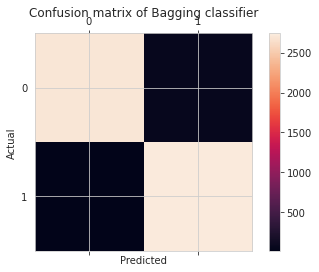



              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2766
           1       0.98      1.00      0.99      2754

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



In [99]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, predictions_bagg))
print('\n')

labels=[0,1]
cmx=confusion_matrix(y_test, predictions_bagg, labels)
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(cmx)
plt.title('Confusion matrix of Bagging classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, predictions_bagg))

# Adaptive Boosting

In [100]:
from sklearn.ensemble import AdaBoostClassifier
Ada_boost=AdaBoostClassifier(n_estimators=500)
Ada_boost.fit(X_train,y_train)
Ada_boost.score(X_test, y_test)

y_adaboost_preds = Ada_boost.predict(X_test)

print(confusion_matrix(y_test, y_adaboost_preds))
print('\n')
print(classification_report(y_test, y_adaboost_preds))

[[2676   90]
 [  47 2707]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2766
           1       0.97      0.98      0.98      2754

    accuracy                           0.98      5520
   macro avg       0.98      0.98      0.98      5520
weighted avg       0.98      0.98      0.98      5520



# Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_boosting=GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1)
Gradient_boosting.fit(X_train,y_train)
Gradient_boosting.score(X_test, y_test)

y_gradientboost_preds = Gradient_boosting.predict(X_test)

print(confusion_matrix(y_test, y_gradientboost_preds))
print('\n')
print(classification_report(y_test, y_gradientboost_preds))

[[2658  108]
 [  43 2711]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2766
           1       0.96      0.98      0.97      2754

    accuracy                           0.97      5520
   macro avg       0.97      0.97      0.97      5520
weighted avg       0.97      0.97      0.97      5520



# eXtreme Gradient Boosting

In [102]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost=XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgboost.fit(X_train,y_train)
xgboost.score(X_test, y_test)

y_xgboost_preds = xgboost.predict(X_test)

print(confusion_matrix(y_test, y_xgboost_preds))
print('\n')
print(classification_report(y_test, y_xgboost_preds))

[[2715   51]
 [  23 2731]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2766
           1       0.98      0.99      0.99      2754

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



# Comparative Analysis of the Accuracy

In [104]:
# Accuracy of Base Learners
print('Support Vector Machine: {}'.format(grid_svm.score(X_test, y_test)))
print('Gaussian NB: {}'.format(nb.score(X_test, y_test)))
print('Decision Tree: {}'.format(dtree.score(X_test, y_test)))
print('\n')

# Accuracy of Majority Voting Ensemble Learning and Weighted Average Ensemble Learning
print('Majority Voting : {}'.format(majority_voting.score(X_test, y_test)))
print('Weighted Average : {}'.format(weighted_avg.score(X_test, y_test)))
print('\n')

# Accuracy of Bagging and Boosting Ensemble Learning Classifiers
print('Bagging : {}'.format(clf_bagg.score(X_test, y_test)))
print('Adaptive Boosting: {}'.format(Ada_boost.score(X_test, y_test)))
print('Gradient Boosting: {}'.format(Gradient_boosting.score(X_test, y_test)))
print('XGBoost: {}'.format(xgboost.score(X_test, y_test)))


Support Vector Machine: 0.9019927536231884
Gaussian NB: 0.9344202898550724
Decision Tree: 0.972463768115942


Majority Voting : 0.9358695652173913
Weighted Average : 0.9697463768115943


Bagging : 0.9871376811594202
Adaptive Boosting: 0.9751811594202898
Gradient Boosting: 0.9726449275362319
XGBoost: 0.9865942028985507
